# Проект: Исследование стартапов

## Введение

Я решил провести исследование на основании нескольких таблиц с данными о стартапах:
— информация о самих стартапах и их финансировании различными фондами;
— сведения о сотрудниках этих стартапов и их образовательном фоне.

В ходе работы я поставил перед собой следующие задачи:

оценить полноту и качество исходных данных;

выполнить предобработку для дальнейшего анализа;

проанализировать ключевые метрики, представляющие интерес;

при возможности выделить признаки, наиболее сильно коррелирующие с успешной сделкой по покупке стартапа.

Главная цель исследования — выявить стартапы с наибольшим потенциалом для последующего приобретения, развития и перепродажи.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv

### 1.1. Вывод общей информации, исправление названия столбцов

In [2]:
!pip install -q missingno 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import numpy as np
import missingno as msno

In [4]:
acquisition = pd.read_csv('/datasets/acquisition.csv')
company_and_rounds = pd.read_csv('/datasets/company_and_rounds.csv')
degrees = pd.read_csv('/datasets/degrees.csv')
education = pd.read_csv('/datasets/education.csv')
fund = pd.read_csv('/datasets/fund.csv')
investment = pd.read_csv('/datasets/investment.csv')
people = pd.read_csv('/datasets/people.csv')

In [5]:
for df in [acquisition, company_and_rounds, degrees, education, fund, investment, people]:
    print(df.columns)
    print()

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

Index(['id', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

Index(['id', 'funding_round_id', 'company_id', 'fund_id'], dtype='object')

Index(['id', 'first_name', 

Видим, что в датафрейме **company_and_rounds** столбцы не приведены к snake_case.

In [6]:
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [7]:
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [8]:
acquisition.isna().mean().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm').format("{:.4f}")

,0
term_code,0.8054
acquired_at,0.0031
id,0.0000
acquiring_company_id,0.0000
acquired_company_id,0.0000
price_amount,0.0000


Проверим наличие явных дубликатов:

In [9]:
acquisition_duplicates = acquisition.duplicated()
acquisition_duplicates.sum()

0

Столбец **acquired_at** можно привести к datetime.  
Явных дубликатов нет.

In [10]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [11]:
company_and_rounds.head().T

,0,1,2,3,4
company ID,1.0,1.0,1.0,10.0,100.0
name,Wetpaint,Wetpaint,Wetpaint,Flektor,There
category code,web,web,web,games_video,games_video
status,operating,operating,operating,acquired,acquired
founded at,2005-10-17,2005-10-17,2005-10-17,NaN,NaN
closed at,NaN,NaN,NaN,NaN,NaN
domain,wetpaint-inc.com,wetpaint-inc.com,wetpaint-inc.com,flektor.com,there.com
network username,BachelrWetpaint,BachelrWetpaint,BachelrWetpaint,NaN,NaN
country code,USA,USA,USA,USA,USA
investment rounds,0.0,0.0,0.0,0.0,0.0


In [12]:
company_and_rounds[(company_and_rounds['company  ID'] != company_and_rounds['company  id']) &
                   (company_and_rounds['company  ID'].notna()) &
                   (company_and_rounds['company  id'].notna())]['company  ID'].count()

0

In [13]:
company_and_rounds[(company_and_rounds['company  ID'] != company_and_rounds['company  id']) &
                   (company_and_rounds['company  ID'].isna()) &
                   (company_and_rounds['company  id'].notna())]

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
217472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,457.0,1267.0,2005-01-01,series-a,48000000.0,0.0,2.0,1.0,1.0
217473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,471.0,558.0,2007-01-01,angel,300000.0,0.0,1.0,1.0,1.0
217474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,575.0,746.0,2004-09-01,angel,0.0,0.0,0.0,1.0,1.0
217475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,577.0,748.0,2007-01-01,series-a,1500000.0,2250000.0,0.0,1.0,1.0
217476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.0,804.0,2007-06-01,series-a,6000000.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


Выводим те данные, где нет пропусков и где столбцы **company_ID** и **company_id** НЕ равны и видим, что таких данных нет.  
Значит, эти столбцы связаны. Но есть одна особенность, есть строки, где значения встречаются либо в первом, либо во втором столбце.

In [14]:
company_and_rounds.isna().mean().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm').format("{:.4f}")

,0
closed at,0.9842
funded at,0.7581
is last round,0.7570
funding round type,0.7570
is first round,0.7570
participants,0.7570
pre money valuation,0.7570
raised amount,0.7570
funding round id,0.7570
company id,0.7570


In [15]:
company_and_rounds['investment  rounds'].unique()

array([  0.,   1.,   3.,  32.,   2.,   4.,   9.,  30.,  17.,   7.,   6.,
         8.,  18.,   5.,  25.,  19.,  49.,  21.,  16.,  14.,  37.,  96.,
        22.,  10.,  12., 478.,  15.,  89.,  11.,  24., 297.,  20.,  29.,
       125.,  33.,  40.,  38.,  68.,  13.,  44.,  58.,  51.,  nan])

In [16]:
company_and_rounds['funding  rounds'].unique()

array([ 3.,  0.,  1.,  5.,  2.,  7.,  4.,  6.,  8., 10.,  9., 13., 11.,
       15., 14., 12., nan])

In [17]:
company_and_rounds['milestones'].unique()

array([ 5.,  0.,  4.,  1.,  3.,  2.,  6.,  8.,  7.,  9., nan])

Проверим наличие явных дубликатов:

In [18]:
company_and_rounds_duplicates = company_and_rounds.duplicated()
company_and_rounds_duplicates.sum()

0

В датафрейме **company_and_rounds** следует изменить тип данных у следующих столбцов:
- **founded at**, **closed at**, **funded at** на datetime
- **company  ID**, **investment  rounds**, **funding  rounds**, **milestones** после работы пропусками можно изменить на int.

В остальных столбцах слишком много пропусков, чтобы изменить тип их данных.  
Явных дубликатов нет.

In [19]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [20]:
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [21]:
people.isna().mean().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm').format("{:.4f}")

,0
company_id,0.8473
network_username,0.8286
first_name,0.0000
last_name,0.0000
id,0.0000


Проверим наличие явных дубликатов:

In [22]:
people_duplicates = people.duplicated()
people_duplicates.sum()

0

В датафрейме **people** всё оставляем как есть.  
Явных дубликатов нет. 

In [23]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [24]:
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [25]:
education.isna().mean().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm').format("{:.4f}")

,0
graduated_at,0.4704
instituition,0.0005
id,0.0000
person_id,0.0000


Проверим наличие явных дубликатов:

In [26]:
education_duplicates = education.duplicated()
education_duplicates.sum()

0

Столбец **graduated_at** можно привести к datetime.  
Явных дубликатов нет.

In [27]:
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [28]:
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [29]:
degrees.isna().mean().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm').format("{:.4f}")

,0
subject,0.2583
degree_type,0.1024
id,0.0000
object_id,0.0000


Проверим наличие явных дубликатов:

In [30]:
degrees_duplicates = degrees.duplicated()
degrees_duplicates.sum()

0

В датафрейме **degrees** ничего не меняем.  
Явных дубликатов нет.

In [31]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11649 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [32]:
fund.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [33]:
fund.isna().mean().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm').format("{:.4f}")

,0
network_username,0.8156
founded_at,0.6048
country_code,0.3947
domain,0.3682
name,0.0003
id,0.0000
investment_rounds,0.0000
invested_companies,0.0000
milestones,0.0000


In [34]:
fund[['investment_rounds', 'invested_companies', 'milestones']].max()

investment_rounds     529
invested_companies    441
milestones              7
dtype: int64

Проверим наличие явных дубликатов:

In [35]:
fund_duplicates = fund.duplicated()
fund_duplicates.sum()

0

Здесь мы можем провести следующие изменения:
- **founded_at** приведём к datetime
- **investment_rounds**, **invested_companies**, **milestones** снизим разрядность типа integer

Явных дубликатов нет.

In [36]:
investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


In [37]:
investment.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


Проверим наличие явных дубликатов:

In [38]:
investment_duplicates = investment.duplicated()
investment_duplicates.sum()

0

В датафрейме **investment** мы ничего не меняем.  
Явных дубликатов нет.

##### Подведём итог:
- Все данные были загружены, имена столбцов совпадают, но в датафрейме **company_and_rounds** их нужно привести к snake_case.  

- Датафрейм **acquisition**:  
    >9407 строк, 6 столбцов.  
    >Столбец **acquired_at** привести к datetime.  
- Датафрейм **company_and_rounds**:  
    >217774 строки, 22 столбца.  
    >Убрать ненужные пробелы, мешающие работе с данными.  
    >Столбцы **founded at**, **closed at**, **funded at** привести к datetime.  
    >Столбцы **company ID**, **investment rounds**, **funding rounds**, **milestones** после работы пропусками можно изменить на int.  
- Датафрейм **people**:  
    >226709 строк, 5 столбцов.  
- Датафрейм **education**:  
    >109610 строк, 4 столбца.  
    >Столбец **graduated_at** привести к datetime.  
- Датафрейм **degrees**:  
    >109610 строк, 4 столбца.  
- Датафрейм **fund**:  
    >11652 строки, 9 столбцов.  
    >Столбец **founded_at** привести к datetime.  
- Датафрейм **investment**:  
    >61403 строки, 4 столбца.  
- Во всех столбцах, имеющих тип данных integer попробовать снизить разрядность типа, чтобы сэкономить ресурсы.  
  
- Во всех датафреймах имеется значительное количество пропусков.  

### 1.2. Смена типов и анализ пропусков


* Оценим полноту данных:

In [39]:
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'], errors='coerce')

In [40]:
acquisition.dtypes

id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

В датафрейме **company_and_rounds** почти все столбцы названы с использованием нескольких пробелов, что неудобно для работы.  
Напишем функцию для замены пробелов на нижнее подчеркивание, приводить к нижнему регистру не будем, так как в данных есть два столбца с похожим названием.

In [41]:
def replace_spaces(df):
    list_columns = []
    for column in df.columns:
        new_column = []
        space_count = 0
        for char in column:
            if char == " ":
                space_count += 1
            else:
                if space_count == 1:
                    new_column.append('_')
                elif space_count > 1:
                    new_column.append('_')
                space_count = 0
                new_column.append(char)
        if space_count == 1:
            new_column.append('_')
        elif space_count > 1:
            new_column.append('_')

        list_columns.append(''.join(new_column))

    print('old: ', df.columns)
    df.columns = list_columns
    print('new: ', df.columns)

In [42]:
replace_spaces(company_and_rounds)

old:  Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')
new:  Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')


Приводим нужные столбцы к типу datetime

In [43]:
company_and_rounds['founded_at'] = pd.to_datetime(company_and_rounds['founded_at'], errors='coerce')
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'], errors='coerce')
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'], errors='coerce')

In [44]:
company_and_rounds[['founded_at', 'closed_at', 'funded_at']].dtypes

founded_at    datetime64[ns]
closed_at     datetime64[ns]
funded_at     datetime64[ns]
dtype: object

In [45]:
education['graduated_at'] = pd.to_datetime(education['graduated_at'], errors='coerce')

In [46]:
education.dtypes

id                       int64
person_id                int64
instituition            object
graduated_at    datetime64[ns]
dtype: object

In [47]:
# Оптимизация числовых типов данных
def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
    '''
    Function optimizes memory usage in dataframe
    df: pd.DataFrame - data table
    print_size: bool - display of optimization results
    return pd.DataFrame - amount of optimized memory
    '''
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # Типы, которые будем проверять на оптимизацию
    # Размер занимаемой памяти до оптимизации (в Мб)
    before_size = df.memory_usage().sum() / 1024**2    
    for column in df.columns:
        column_type = df[column].dtypes
        if column_type in numerics:
            column_min = df[column].min()
            column_max = df[column].max()
            if str(column_type).startswith('int'):
                if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                    df[column] = df[column].astype(np.int8)
                elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
                elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)  
            else:
                if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)
                else:
                    df[column] = df[column].astype(np.float64)    
    # Размер занимаемой памяти после оптимизации (в Мб)
    after_size = df.memory_usage().sum() / 1024**2
    if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                         .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
    return df

for df in [acquisition, company_and_rounds, degrees, education, fund, investment, people]:
    optimize_memory_usage(df)

Размер использования памяти: до  0.43 Mb - после  0.31 Mb (29.2%)
Размер использования памяти: до 36.55 Mb - после 26.58 Mb (27.3%)
Размер использования памяти: до  3.35 Mb - после  2.93 Mb (12.5%)
Размер использования памяти: до  3.35 Mb - после  2.51 Mb (25.0%)
Размер использования памяти: до  0.80 Mb - после  0.52 Mb (34.7%)
Размер использования памяти: до  1.87 Mb - после  0.82 Mb (56.2%)
Размер использования памяти: до  8.65 Mb - после  6.92 Mb (20.0%)


In [48]:
for df in [acquisition, company_and_rounds, degrees, education, fund, investment, people]:
    df.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int16         
 1   acquiring_company_id  9407 non-null   int32         
 2   acquired_company_id   9407 non-null   int32         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2), int64(1), object(1)
memory usage: 312.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float32       
 1   name                 217471 non-null  object    

Мы оптимизировали типы данных и сэкономили ресурсы, можно продолжать!

##### Оценка полноты данных:


Из данных, исследованных выше можно сделать следующие выводы о связи таблиц:
- Датафреймы **acquisition** и **company_and_rounds** можно соединить по столбцам **acquiring_company_id** или **acquired_company_id** и **company_id**
- Датафреймы **education** и **degrees** можно соединить по **id**
- Датафреймы **people** и **education** можно соединить по столбцам **id** и **person_id**

Проверим это:

In [49]:
# Функция проверяет количество совпадающих данных в двух датафреймах по столбцам
def check_column_matches(df1, column1, df2, column2):
    unique_values = df1[column1].unique()
    existing_values = set(unique_values) & set(df2[column2].unique())
    missing_values = set(unique_values) - set(df2[column2].unique())

    total_values = len(unique_values)
    percent_existing = len(existing_values) / total_values * 100
    percent_missing = len(missing_values) / total_values * 100

    print(f"Совпадения для столбца {column1} в первом датафрейме и {column2} во втором:")
    print(f"> Найдены в {len(existing_values)} ({percent_existing:.2f}%) строках.")
    print(f"> Отсутствуют в {len(missing_values)} ({percent_missing:.2f}%) строках.\n")

In [50]:
check_column_matches(acquisition, 'acquiring_company_id', company_and_rounds, 'company_id')
check_column_matches(acquisition, 'acquired_company_id', company_and_rounds, 'company_id')

Совпадения для столбца acquiring_company_id в первом датафрейме и company_id во втором:
> Найдены в 1506 (31.42%) строках.
> Отсутствуют в 3287 (68.58%) строках.

Совпадения для столбца acquired_company_id в первом датафрейме и company_id во втором:
> Найдены в 2563 (27.67%) строках.
> Отсутствуют в 6701 (72.33%) строках.



In [51]:
check_column_matches(education, 'id', degrees, 'id')

Совпадения для столбца id в первом датафрейме и id во втором:
> Найдены в 109610 (100.00%) строках.
> Отсутствуют в 0 (0.00%) строках.



In [52]:
check_column_matches(education, 'person_id', people, 'id')

Совпадения для столбца person_id в первом датафрейме и id во втором:
> Найдены в 68071 (99.44%) строках.
> Отсутствуют в 380 (0.56%) строках.



Также проверим, совпадают ли данные о сотрудниках в **people** и **company_and_rounds** по **company_id** или **network_username**

In [53]:
check_column_matches(company_and_rounds, 'company_id', people, 'company_id')

Совпадения для столбца company_id в первом датафрейме и company_id во втором:
> Найдены в 6372 (19.95%) строках.
> Отсутствуют в 25568 (80.05%) строках.



In [54]:
check_column_matches(company_and_rounds, 'company_ID', people, 'company_id')

Совпадения для столбца company_ID в первом датафрейме и company_id во втором:
> Найдены в 22922 (11.66%) строках.
> Отсутствуют в 173632 (88.34%) строках.



In [55]:
check_column_matches(company_and_rounds, 'network_username', people, 'network_username')

Совпадения для столбца network_username в первом датафрейме и network_username во втором:
> Найдены в 2200 (2.76%) строках.
> Отсутствуют в 77372 (97.24%) строках.



Исследовав данные, а так же их связи и пропуски, можно сделать вывод, что данные соответствуют здравому смыслу, но в них много пропусков.  
Однако не все из них помешают анализу, некоторые обоснованы тем, что информация о компании есть, но она не финансировалась.  
Также данные о сотрудниках практически не пересекаются с данными о компаниях, поэтому их можно будет исследовать отдельно от компаний.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Я решил провести анализ раундов финансирования стартапов по годам, используя данные из файла company_and_rounds.csv.

После этого я отвечу на вопросы:
- В каком году «типичный» объём финансирования за раунд достиг максимума?
- Как изменялись количество раундов и средний (типичный) размер раунда в 2013 году?

In [56]:
pivot = pd.pivot_table(company_and_rounds, 
                       values=['raised_amount', 'funding_round_id'], 
                       index=company_and_rounds['funded_at'].dt.year, 
                       aggfunc={'raised_amount': 'median', 
                                'funding_round_id': 'count'}, 
                       fill_value=0)
pivot.columns = ['funding_rounds', 'funds_per_round']
pivot = pivot[pivot['funding_rounds'] > 50]
pivot = pivot.reset_index()
pivot['funded_at'] = pivot['funded_at'].astype(int)
pivot

,funded_at,funding_rounds,funds_per_round
0,1999,76,2000000.0
1,2000,125,4200000.0
2,2001,96,3000000.0
3,2002,116,4200000.0
4,2003,159,3000000.0
5,2004,291,5000000.0
6,2005,1633,5500000.0
7,2006,2436,5000000.0
8,2007,3279,3973320.0
9,2008,3774,3110000.0


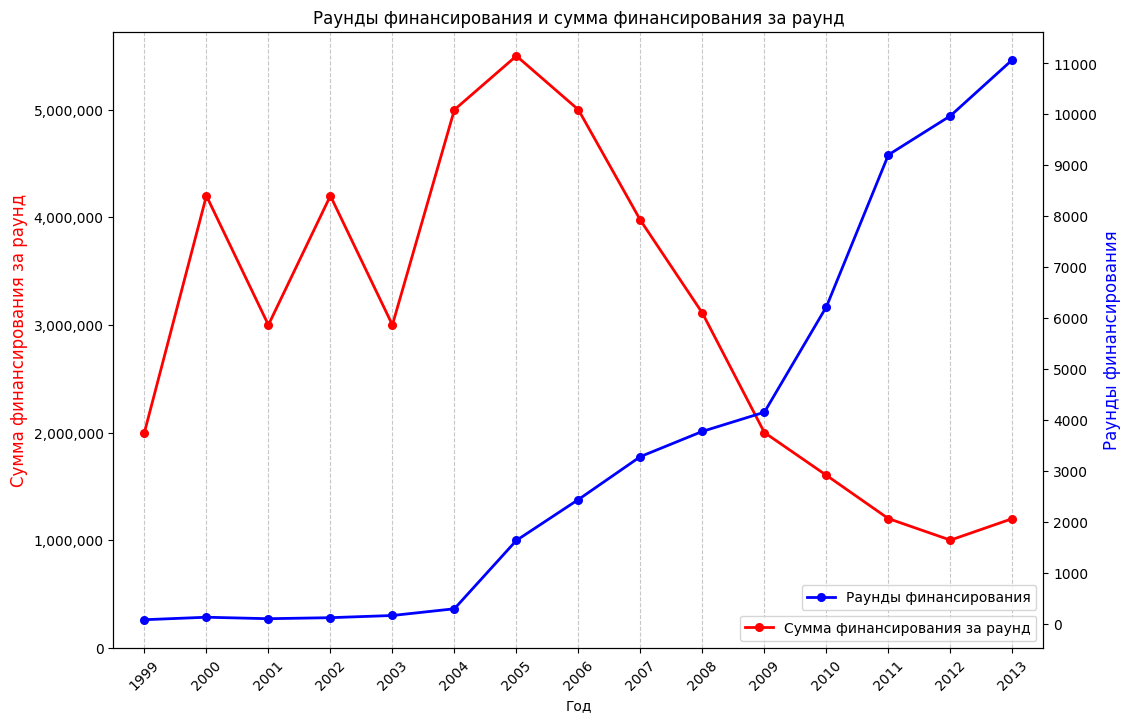

In [57]:
plt.figure(figsize=(12, 8))

ax1 = sns.pointplot(data=pivot, x='funded_at', y='funds_per_round', label='Сумма финансирования за раунд',
                    color='red', marker='o', markersize=5, linewidth=2)

ax2 = ax1.twinx()
sns.pointplot(data=pivot, x='funded_at', y='funding_rounds', label='Раунды финансирования',
              color='blue', marker='o', markersize=5, linewidth=2, ax=ax2)

plt.title('Раунды финансирования и сумма финансирования за раунд')
ax1.set_xlabel('Год', fontsize=10)
ax1.set_ylabel('Сумма финансирования за раунд', color='red', fontsize=12)
ax2.set_ylabel('Раунды финансирования', color='blue', fontsize=12)

ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(pivot['funded_at'], rotation=45, fontsize=10)

ax1.set_yticks(np.arange(0, pivot['funds_per_round'].max() + 1, 1_000_000))  # Ось Y для финансирования
ax2.set_yticks(np.arange(0, pivot['funding_rounds'].max() + 1, 1000))  # Ось Y для раундов финансирования

ax1.grid(axis='x', linestyle='--', alpha=0.7)
ax1.legend(loc='lower right')
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0.05))

ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

На основе полученных данных, отвечаем на вопросы:

Типичный размер средств, собранных в рамках одного раунда был максимален в 2005 году и составил 5,5 миллионов.  
Изучая тендецию финансирования в 2013 году, мы видим рост количества раундов финансирования, которые превысили отметку в 11000 раундов, а также рост суммы финансирования в среднем за раунд, выросший до 1,2 миллионов. 


### 2.2. Люди и их образование

Я решил исследовать, как полнота сведений об образовании сотрудников соотносится с размером компаний. 

In [58]:
people_education = pd.merge(people, education, how='left', left_on='id', right_on='person_id', suffixes=('_people', '_education'))

Соединяем данные с помощью left, так как не у всех сотрудников есть информация об образовании

In [59]:
people_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         267694 non-null  int32         
 1   first_name        267685 non-null  object        
 2   last_name         267690 non-null  object        
 3   company_id        44789 non-null   float32       
 4   network_username  50775 non-null   object        
 5   id_education      109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float32(1), float64(2), int32(1), object(4)
memory usage: 16.3+ MB


In [60]:
people_education.head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


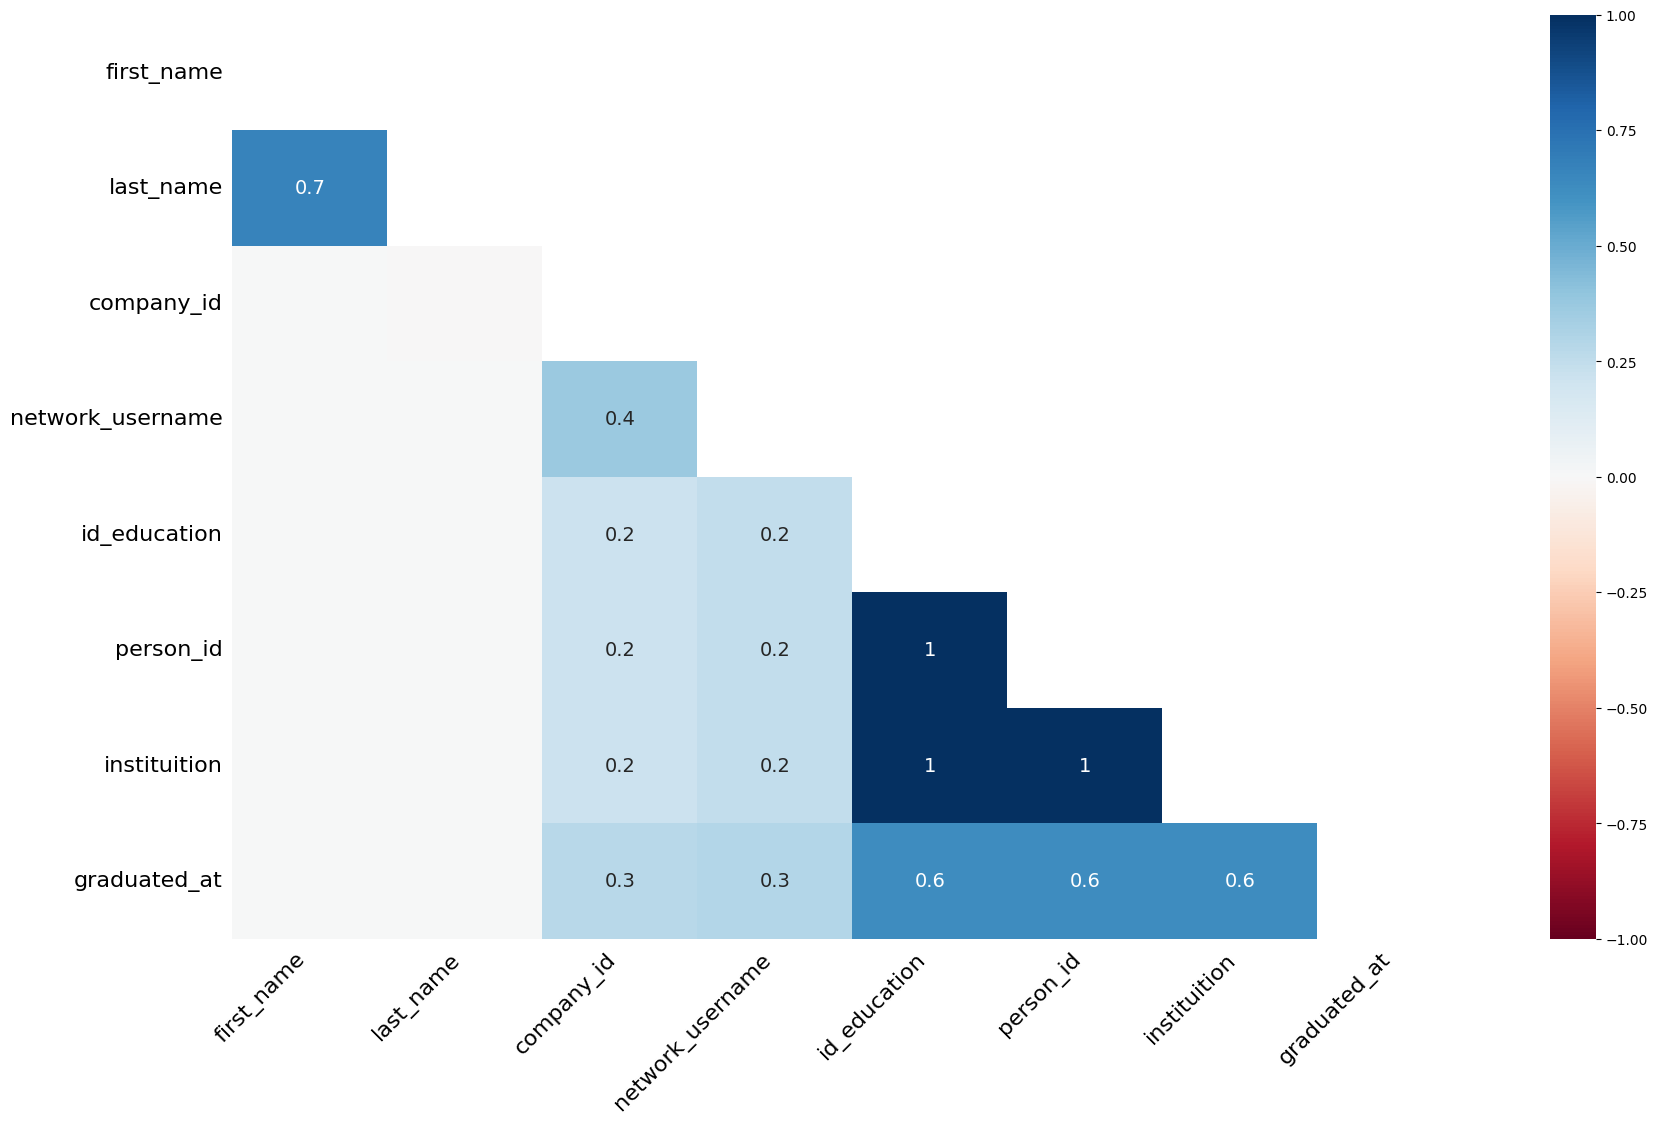

In [61]:
msno.heatmap(people_education)
plt.show()

**network_username** имеет незначительное количество пропусков.  
**id_education**, **person_id** и **instituition** имеют схожую корреляцию, что означает, что если отсутствует **id_education**, скорее всего, нет и информации об учебном заведении **instituition**.  
**graduated_at** коррелирует с **id_education** и **person_id**, что логично, ведь если нет информации об образовании, то и дата выпуска отсутствует.

In [62]:
people_education.groupby('company_id')['id_people'].nunique().sort_values(ascending=False)

company_id
59.0        244
29.0        150
1242.0      138
231067.0     72
499.0        63
           ... 
63585.0       1
7258.0        1
63581.0       1
63580.0       1
70884.0       1
Name: id_people, Length: 22922, dtype: int64

Посмотрим, какие количества сотрудников есть в данных, чтобы выбрать границы групп.

In [63]:
company_sizes = people_education.groupby('company_id')['id_people'].nunique().reset_index()
company_sizes = company_sizes.rename(columns={'id_people':'num_people'})
company_sizes['num_people'].value_counts(normalize=True).sort_index().to_frame().style.background_gradient(cmap='coolwarm').format("{:.4f}")

,proportion
num_people,
1,0.7904
2,0.1182
3,0.0402
4,0.0196
5,0.0103
6,0.0060
7,0.0044
8,0.0026
9,0.0020


79% сотрудников работают в соло-стартапах.

In [64]:
bins = [0, 1, 3, company_sizes['num_people'].max()]
labels = ['Соло-стартап', 'Маленькая команда', 'Средние и крупные стартапы']
company_sizes['size_category'] = pd.cut(company_sizes['num_people'], bins=bins, labels=labels)

people_education = people_education.merge(company_sizes[['company_id', 'size_category']], on='company_id', how='left')

people_education.head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,size_category
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,Средние и крупные стартапы
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,Средние и крупные стартапы
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,Маленькая команда
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,Маленькая команда
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [65]:
people_education.isna().sum()

id_people                0
first_name               9
last_name                4
company_id          222905
network_username    216919
id_education        158638
person_id           158638
instituition        158692
graduated_at        210003
size_category       222905
dtype: int64

Данные разделили на группы, исходя из следующих предположений:  

- 1 сотрудник - соло стартап. Такие стартапы часто находятся на стадии идеи или прототипа.  
- до 3 сотрудников - маленькая команда. Основная команда из нескольких человек, часто ключевые специалисты.  
- от 4 и больше - средние и крупные стартапы. Мы объединим их в одну группу, так как их очень мало, по сравнению с остальными.

Теперь посмотрим на количество стартапов в каждой категории:

In [66]:
category_counts = people_education.groupby('size_category', observed=False)['id_people'].count()
category_counts

size_category
Соло-стартап                  23292
Маленькая команда             10512
Средние и крупные стартапы    10985
Name: id_people, dtype: int64

In [67]:
category_counts.sum()

44789

In [68]:
people_education['id_people'].count()

267694

In [69]:
category_shares = category_counts / category_counts.sum()
category_shares

size_category
Соло-стартап                  0.520038
Маленькая команда             0.234700
Средние и крупные стартапы    0.245261
Name: id_people, dtype: float64

52% всех стартапов - это соло-стартапы, в которых состоит один человек.  
23.5%  - маленькие команды до 3 человек.  
24.5% - средние и крупные стартапы от 4 человек. 

Теперь ответим на вопрос об образовании сотрудников.

In [70]:
people_education['education'] = people_education['instituition'].notna()

Доля сотрудников с образованием:

In [71]:
education_share = people_education.drop_duplicates(subset='id_people').groupby('size_category', observed=False)['education'].mean()
education_share.to_frame().style.background_gradient(cmap='coolwarm').format("{:.2f}")

,education
size_category,
Соло-стартап,0.54
Маленькая команда,0.53
Средние и крупные стартапы,0.53


Доля сотрудников без образования:

In [72]:
no_education_share = 1 - education_share
no_education_share.to_frame().style.background_gradient(cmap='coolwarm').format("{:.2f}")

,education
size_category,
Соло-стартап,0.46
Маленькая команда,0.47
Средние и крупные стартапы,0.47


Доля сотрудников без образования примерно одинакова для всех стартапов - 47%. У соло-стартапов - 46%.

Оценим возможность присоединить таблицу degrees.csv

In [73]:
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int32 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int32(1), object(3)
memory usage: 2.9+ MB


In [74]:
degrees.head(10)

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
5,6,p:1017,BS,Computer Science
6,7,p:6176,BS,Computer Science
7,8,p:5412,MS,Politics
8,9,p:1243,BA,International Business & Marketing
9,10,p:6265,BS,Economics


Таблица **degrees** имеет тип данных **object**, поскольку каждый идентификатор сотрудника имеет приставку **"p:"**.  
Исправим это и сменим тип данных на числовой.

In [75]:
degrees['object_id'] = degrees['object_id'].str.replace('p:', '')

In [76]:
degrees.head()

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"


In [77]:
degrees['object_id'] = pd.to_numeric(degrees['object_id'], downcast='integer')

In [78]:
degrees['object_id'].dtypes

dtype('int32')

Теперь можно присоединить данные о типе образования к основному датафрейму.

In [79]:
people_education_degrees = people_education.merge(degrees, how='left', left_on='id_people', right_on='object_id')

In [80]:
people_education_degrees.head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,size_category,education,id,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,Средние и крупные стартапы,True,2415.0,10.0,NaN,Computer Science
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,Средние и крупные стартапы,False,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,Маленькая команда,False,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,Маленькая команда,False,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,False,NaN,NaN,NaN,NaN


In [81]:
new_education_share = (
    (people_education_degrees['instituition'].isna()) & 
    (people_education_degrees['id'].notna())
).mean()
round(new_education_share * 100, 2)

0.02

Нам удалось присоединить таблицу **degrees** к данным, теперь у нас есть полная информация об образовании сотрудников.  
При этом количество строк, в которых раньше не было информации об образовании, а теперь появилась увеличилось на 0.02%.  
Таким образом, эта информация не изменит результаты исследования, проведенного выше.  

### 2.3. Объединять или не объединять — вот в чём вопрос

При предварительном анализе обнаружено, что некоторые названия столбцов повторяются в разных таблицах. Например, столбец company_id содержит множество совпадающих значений между датасетами, что позволяет использовать его для объединения данных.

Теперь необходимо проверить другой повторяющийся столбец — network_username. Интересно выяснить, встречаются ли одни и те же значения в этом столбце между различными таблицами, и если да, то насколько часто это происходит.

Поставим цель: оценить, можно ли использовать network_username в качестве ключа для объединения данных из разных источников.

Используем ранее написанную функцию.

In [82]:
check_column_matches(people_education_degrees, 'network_username', fund,'network_username')

Совпадения для столбца network_username в первом датафрейме и network_username во втором:
> Найдены в 80 (0.21%) строках.
> Отсутствуют в 38342 (99.79%) строках.



Таким образом, столбец **network_username** нецелесообразно использовать для объединения таблиц **people** и **fund**, так как они практически не имеют пересечений - всего 0.21%.


### 2.4. Проблемный датасет и причина возникновения пропусков

В ходе работы с данными оказалось, что наибольшее количество вопросов вызывает таблица company_and_rounds.csv. Пропуски затрагивают в основном информацию о раундах финансирования, которая является ключевой для понимания структуры инвестиций. Несмотря на то что аналогичные сведения о суммах встречаются и в других таблицах, именно значения из company_and_rounds.csv считаются наиболее достоверными.

Для дальнейшего анализа необходимо привести эти данные к форме, которая позволит исследовать информацию на уровне отдельных компаний. Это может включать преобразование структуры таблицы, переименование столбцов, изменение формата хранения или пересборку данных из разных источников.

Следует обратить внимание:

на структуру текущего датасета;

на то, как распределены данные по строкам;

на корректность и согласованность значений;

на возможность связать информацию с другими таблицами без потерь.

Цель — получить таблицу, где каждая строка соответствует одной компании и при этом сохраняется как можно больше информации из исходного набора. Такой формат должен позволять фильтрацию по условиям (например, по типу раунда, объёму финансирования, дате привлечения инвестиций), а также вычисление агрегированных и относительных метрик на уровне одной компании.

---

Для того, чтобы проводить анализ в разрезе отдельных компаний, отдельно от раундов финансирования, нам нужно разделить датасет на два.

In [83]:
companies = company_and_rounds.loc[:, :'milestones']

In [84]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         217472 non-null  float32       
 1   name               217471 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float32       
 10  funding_rounds     217472 non-null  float32       
 11  funding_total      217472 non-null  float32       
 12  milestones         217472 non-null  float32       
dtypes: datetime64[ns](2), float32(5), object(6)


Для приведения всех данных к общему виду, заменим название столбца **company_ID** на **company_id**.

In [85]:
companies = companies.rename(columns={'company_ID': 'company_id'})

In [86]:
companies.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones'],
      dtype='object')

In [87]:
funding_rounds = company_and_rounds.loc[:, 'funding_round_id': 'is_last_round']

In [88]:
funding_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float32       
 1   company_id           52928 non-null  float32       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float32       
 5   pre_money_valuation  52928 non-null  float32       
 6   participants         52928 non-null  float32       
 7   is_first_round       52928 non-null  float32       
 8   is_last_round        52928 non-null  float32       
dtypes: datetime64[ns](1), float32(7), object(1)
memory usage: 9.1+ MB


In [89]:
companies.duplicated().sum()

21220

In [90]:
companies.shape[0]

217774

In [91]:
companies[companies.duplicated(subset='company_id', keep=False)]

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
21,10015.0,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.0,5.0,68069200.0,0.0
22,10015.0,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.0,5.0,68069200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
companies = companies.drop_duplicates()

In [93]:
companies.shape[0]

196554

In [94]:
funding_rounds.duplicated().sum()

164845

In [95]:
funding_rounds.shape[0]

217774

In [96]:
funding_rounds[funding_rounds.duplicated(subset=['funding_round_id'], keep=False)]

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
217457,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
217460,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
217461,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
217462,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
funding_rounds = funding_rounds.drop_duplicates()

In [98]:
funding_rounds.shape[0]

52929

Таким образом, мы разделили данные на два датасета, для удобства анализа каждой компании по отдельности.  
При необходимости мы можем присоединить датасеты снова по столбцу **company_id**.  
Также мы удалили пропуски, которые возникли при прошлом объединении таблиц.


## Шаг 3. Исследовательский анализ объединённых таблиц


### 3.1. Объединение данных

In [99]:
companies_filtered = companies[(companies['funding_rounds'] > 0) | 
                                (companies['investment_rounds'] > 0) | 
                                (companies['status'] == 'acquired')]

In [100]:
df = companies_filtered.merge(funding_rounds, on='company_id', how='left')
df = df.merge(acquisition, left_on='company_id', right_on='acquired_company_id', how='left')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61855 entries, 0 to 61854
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            61855 non-null  float32       
 1   name                  61855 non-null  object        
 2   category_code         56181 non-null  object        
 3   status                61855 non-null  object        
 4   founded_at            46679 non-null  datetime64[ns]
 5   closed_at             2957 non-null   datetime64[ns]
 6   domain                56543 non-null  object        
 7   network_username      35914 non-null  object        
 8   country_code          55520 non-null  object        
 9   investment_rounds     61855 non-null  float32       
 10  funding_rounds        61855 non-null  float32       
 11  funding_total         61855 non-null  float32       
 12  milestones            61855 non-null  float32       
 13  funding_round_id

Мы объединили данные в один датафрейм, чтобы в будущем работать только с ним.


### 3.2. Анализ выбросов

Хочется понять, какие значения общего объёма финансирования — по столбцу funding_total — можно считать типичными для компаний в этом наборе данных, а какие — аномальными или выбивающимися из общей картины.
Также стоит проверить, насколько данные асимметричны, чтобы понять, применимы ли стандартные методы оценки или лучше использовать устойчивые к выбросам подходы.

In [102]:
pd.options.display.float_format = '{:.2f}'.format

In [103]:
df['funding_total'].describe().to_frame().style.background_gradient(cmap='coolwarm').format("{:.2f}")

,funding_total
count,61855.00
mean,21134482.00
std,90028936.00
min,0.00
25%,59700.00
50%,2477000.00
75%,15950000.00
max,5699999744.00


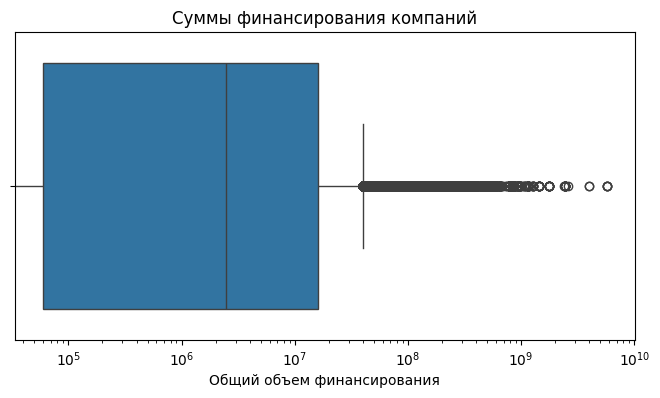

In [104]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['funding_total'])
plt.xscale('log')
plt.xlabel('Общий объем финансирования')
plt.title('Суммы финансирования компаний')
plt.show()

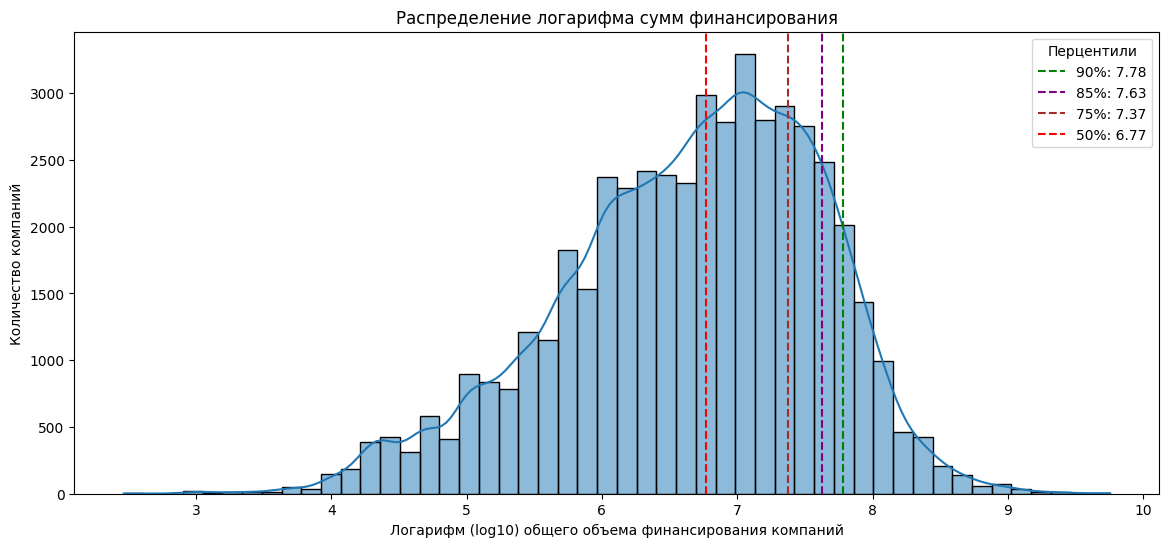

In [105]:
log_funding = np.log10(df[df['funding_total'] > 0]['funding_total'] + 1)
plt.figure(figsize=(14,6))
sns.histplot(log_funding, bins=50, kde=True)

plt.xlabel('Логарифм (log10) общего объема финансирования компаний')
plt.ylabel('Количество компаний')
plt.title('Распределение логарифма сумм финансирования')

percentiles = np.percentile(log_funding, [90, 85, 75, 50])
percentile_labels = ['90%', '85%', '75%', '50%']
percentile_colors = ['green', 'purple', 'brown', 'red']  # разные цвет для каждой линии
for percentile, label, color in zip(percentiles, percentile_labels, percentile_colors):
    plt.axvline(percentile, color=color, linestyle='--', label=f'{label}: {percentile:.2f}')
    
plt.legend(title='Перцентили')

plt.show()

Основная часть значений сосредоточена в интервале 7 по log10, что соответствует 10 млн долларов.

In [106]:
df['funding_total'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95]).to_frame().style.background_gradient(cmap='coolwarm').format("{:.2f}")

,funding_total
count,61855.00
mean,21134482.00
std,90028936.00
min,0.00
25%,59700.00
50%,2477000.00
75%,15950000.00
90%,49860000.00
95%,85500000.00
max,5699999744.00


In [107]:
Q1 = np.percentile(df['funding_total'], 25)
Q2 = np.percentile(df['funding_total'], 50)
Q3 = np.percentile(df['funding_total'], 75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f"Нижний ус: {lower}")
print(f"Верхний ус: {upper}")

Нижний ус: -23775750.0
Верхний ус: 39785450.0


In [108]:
log_funding.describe()

count   48503.00
mean        6.65
std         0.96
min         2.47
25%         6.03
50%         6.77
75%         7.37
max         9.76
Name: funding_total, dtype: float64

Из полученных данных видим, что типичный размер финансирования - это медиана, равная примерно 5.9 млн долларов (10 в степени 6.77). 

В исходных данных среднее значение сильно сдвинуто и составляет 21 миллион.  
Это происходит из-за большого количества выбросов в значениях. Эти выбросы, скорее всего, не являются ошибкой, так как речь идёт о финансировании компаний.  
Выбивающимися значениями будут те значения, которые превышают границу в 40 миллионов. 
Также стоит отметить, что из-за слишком большой разницы между 25 и 75 процентилями, нижний ус ящика уходит в отрицательные значения. Сумма финансирования не может быть отрицательной, поэтому реальных значений в этой области нет.  
Всё это указывает на наличие крупных сумм в финансировании некоторых компаний.


### 3.3. Куплены забесплатно?

Возникает интересная аномалия: в таблице встречаются компании, которые были проданы либо за ноль, либо за один доллар, при этом у них есть данные о ненулевом объёме привлечённого финансирования. Это может быть признаком либо ошибок в данных, либо нестандартных кейсов (например, фиктивных продаж, банкротств или выкупов внутри группы компаний).

Для начала отфильтруем данные согласно условиям.

In [109]:
zero_sales = df[(df['funding_total'] > 0) & (df['price_amount'] <= 1)]
zero_sales = zero_sales.copy()

In [110]:
zero_sales.shape[0]

3059

In [111]:
zero_sales.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,pre_money_valuation,participants,is_first_round,is_last_round,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
38,10054.00,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.00,...,0.00,6.00,0.00,0.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
39,10054.00,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.00,...,0.00,2.00,0.00,1.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
40,10054.00,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.00,...,0.00,3.00,0.00,0.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
41,10054.00,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.00,...,0.00,4.00,0.00,0.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
42,10054.00,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.00,...,0.00,6.00,0.00,0.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13


In [112]:
zero_sales['status'].unique()

array(['acquired'], dtype=object)

Сразу видим в данных множество дубликатов, которые отличаются в некоторых столбцах, но при этом запись о покупке (id) у них совпадает. Это может значить, что сделка проводилась несколько раз или это обозначение разных этапов одной сделки. Также это может быть ошибкой. В любом случае, для дальнейшего анализа нам эти дубликаты не понадобятся.

In [113]:
zero_sales = zero_sales.drop_duplicates(subset='id')

In [114]:
zero_sales.shape[0]

1618

In [115]:
zero_sales.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,pre_money_valuation,participants,is_first_round,is_last_round,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
38,10054.00,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.00,...,0.00,6.00,0.00,0.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
99,101312.00,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.00,...,0.00,3.00,0.00,0.00,9653.00,11391.00,101312.00,NaN,0.00,2013-09-18
106,101340.00,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.00,...,0.00,0.00,1.00,1.00,7272.00,1972.00,101340.00,NaN,0.00,2012-06-18
107,10137.00,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.00,...,0.00,9.00,0.00,1.00,8254.00,757.00,10137.00,cash_and_stock,0.00,2012-11-05
110,10139.00,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0.00,...,0.00,1.00,0.00,1.00,9326.00,44008.00,10139.00,NaN,0.00,2013-04-01


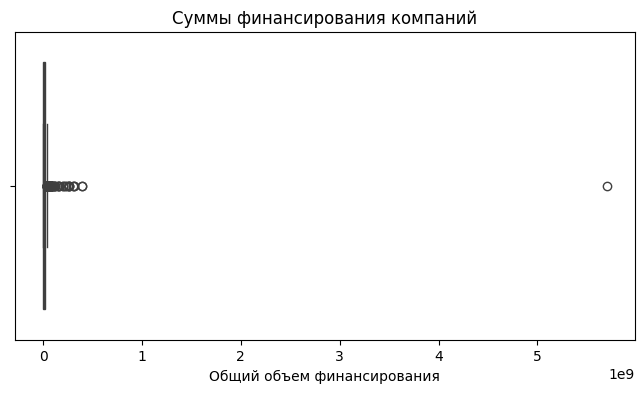

In [116]:
plt.figure(figsize=(8,4))
sns.boxplot(x=zero_sales['funding_total'])
plt.xlabel('Общий объем финансирования')
plt.title('Суммы финансирования компаний')
plt.show()

Теперь рассмотрим график без выбросов.

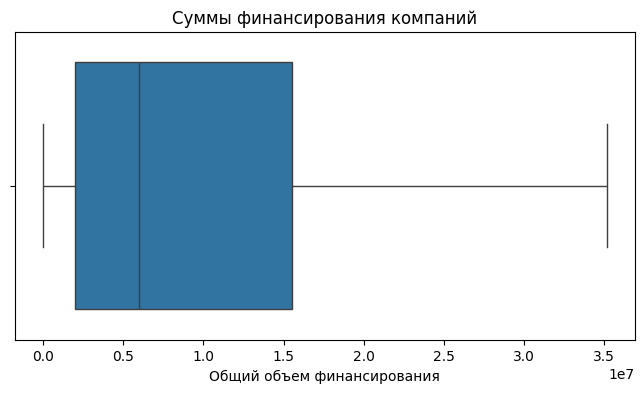

In [117]:
plt.figure(figsize=(8,4))
sns.boxplot(x=zero_sales['funding_total'], showfliers=False)
plt.xlabel('Общий объем финансирования')
plt.title('Суммы финансирования компаний')
plt.show()

Судя по графику, верхняя граница "усов" находится в значении 35 миллионов.

In [118]:
Q1 = np.percentile(zero_sales['funding_total'], 25)
Q2 = np.percentile(zero_sales['funding_total'], 50)
Q3 = np.percentile(zero_sales['funding_total'], 75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f"Нижняя граница или 25 перцентиль: {Q1}")
print(f"Медиана или 50 перцентиль: {Q2}")
print(f"Верзняя граница или 75 перцентиль: {Q3}")
print(f"Нижний ус: {lower}")
print(f"Верхний ус: {upper}")

Нижняя граница или 25 перцентиль: 2000000.0
Медиана или 50 перцентиль: 6000000.0
Верзняя граница или 75 перцентиль: 15500000.0
Нижний ус: -18250000.0
Верхний ус: 35750000.0


In [119]:
percentiles = [i / 10 for i in range(11)]
zero_sales['funding_total'].describe(percentiles=percentiles).to_frame().style.background_gradient(cmap='coolwarm')

,funding_total
count,1618.000000
mean,18152964.000000
std,144503024.000000
min,3750.000000
0%,3750.000000
10%,513588.500000
20%,1400000.000000
30%,2600000.000000
40%,4000000.000000
50%,6000000.000000


In [120]:
zero_sales['funding_total'].describe(percentiles=[.91]).to_frame().style.background_gradient(cmap='coolwarm')

,funding_total
count,1618.000000
mean,18152964.000000
std,144503024.000000
min,3750.000000
50%,6000000.000000
91%,35894000.000000
max,5699999744.000000


Расчёты это подтверждают, верхняя граница "усов" находится на значении 35.75 млн.  
Эта граница соответствует примерно 91 перцентилю.
Нижняя граница при расчётах уходит в минус, поэтому вместо неё будет приниматься 0.

In [121]:
zero_sales.groupby('name')['company_id'].count().sort_values(ascending=False).head().to_frame().style.background_gradient(cmap='coolwarm')

,company_id
name,
Forrst,3
Photobucket,2
Navman Wireless OEM Solutions,2
Kanbox,2
GamerDNA,2


In [122]:
zero_sales['category_code'].value_counts(normalize=True).head().to_frame().style.background_gradient(cmap='coolwarm').format("{:.2f}")

,proportion
category_code,
software,0.23
web,0.14
enterprise,0.08
mobile,0.08
advertising,0.05


In [123]:
zero_sales['country_code'].value_counts(normalize=True).head().to_frame().style.background_gradient(cmap='coolwarm').format("{:.2f}")

,proportion
country_code,
USA,0.80
GBR,0.04
CAN,0.03
DEU,0.02
ISR,0.02


In [124]:
data = zero_sales['acquired_at'].dt.year.value_counts(normalize=True).reset_index()
data.columns = ['acquired_at', 'proportion']
data['acquired_at'] = data['acquired_at'].astype('int')
data.sort_values(by='acquired_at')
data

,acquired_at,proportion
0,2012,0.21
1,2011,0.20
2,2013,0.18
3,2010,0.17
4,2009,0.11
5,2008,0.07
6,2007,0.04
7,2006,0.02
8,2005,0.00
9,2004,0.00


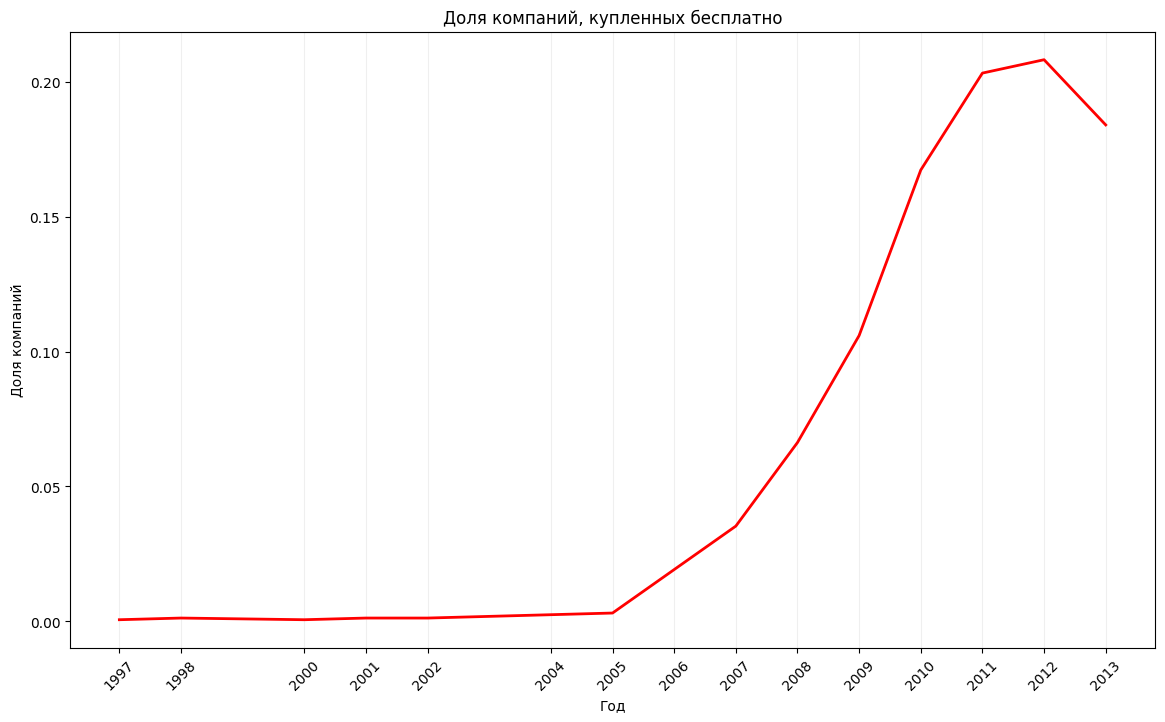

In [125]:
plt.figure(figsize=(14,8))
sns.lineplot(data=data, x='acquired_at', y='proportion', linewidth=2, color='r')
plt.grid(axis='x', alpha=0.2)
plt.xticks(data['acquired_at'], rotation=45)
plt.title('Доля компаний, купленных бесплатно')
plt.xlabel('Год')
plt.ylabel('Доля компаний')
plt.show()

Изучив компании, которые были куплены за ноль или за один доллар, при этом имеющие финансирование, мы увидели следующее:
- Основные категории занимает IT сфера, такие как software - 23%, web - 14%, enterprise и mobile - 8%.
- 83% всех сделок произошли в США.
- Начиная с 2006 года число подобных сделок начало расти.
- Пик пришелся на 2011-2012 годы.

Возможные причины - это расширение крупных IT гигантов, которые начали поглощать мелкие стартапы, а также кризис 2008 года, когда мелкие компании не способны были выжить и им приходилось идти на слияние компаний вместо банкротства.

In [126]:
df['funding_total'].describe().to_frame().style.background_gradient(cmap='coolwarm')

,funding_total
count,61855.000000
mean,21134482.000000
std,90028936.000000
min,0.000000
25%,59700.000000
50%,2477000.000000
75%,15950000.000000
max,5699999744.000000


Выше мы рассмотрели выбросы, границы и процентили по столбцу **funding_total** и проанализировали покупки за 0 и за 1 доллар.  
Учитывая это, можем ответить на вопрос заказчика о замене нижней и верхней границы выбросов на процентили:  
- Как мы уже отметили выше, такие высокие значения финансирования **не являются** выбросами, ведь речь идёт о крупных компаниях.  
- Стандартный метод IQR получает нижнюю границу, которая будет отрицательной, а значит метод не совсем подходит для этих данных.  
- Если заменить выбросы в данных процентилями, мы потеряем большое количество крупных компаний, либо информацию о слиянии мелких компаний с крупными.

В связи с этим, замена нижней и верхней границы процентилями **не рекомендуется**, так как это исказит данные и дальнейший анализ будет неточным.


### 3.4. Цены стартапов по категориям

Интерес представляют категории стартапов с самыми высокими ценами и наибольшим разбросом — они потенциально привлекательны для инвесторов, готовых к риску ради высокой прибыли.

In [127]:
category_prices = df.groupby('category_code')['price_amount'].median().sort_values(ascending=False).reset_index()
category_prices

,category_code,price_amount
0,nanotech,584000000.00
1,real_estate,40000000.00
2,manufacturing,40000000.00
3,photo_video,40000000.00
4,automotive,21500000.00
5,biotech,17600000.00
6,hospitality,10000000.00
7,finance,1200000.00
8,news,0.00
9,nonprofit,0.00


In [128]:
category_prices = category_prices[category_prices['price_amount'] > 0].copy()
category_prices['price_amount_mln'] = category_prices['price_amount'] / 1000000
category_prices

,category_code,price_amount,price_amount_mln
0,nanotech,584000000.00,584.00
1,real_estate,40000000.00,40.00
2,manufacturing,40000000.00,40.00
3,photo_video,40000000.00,40.00
4,automotive,21500000.00,21.50
5,biotech,17600000.00,17.60
6,hospitality,10000000.00,10.00
7,finance,1200000.00,1.20


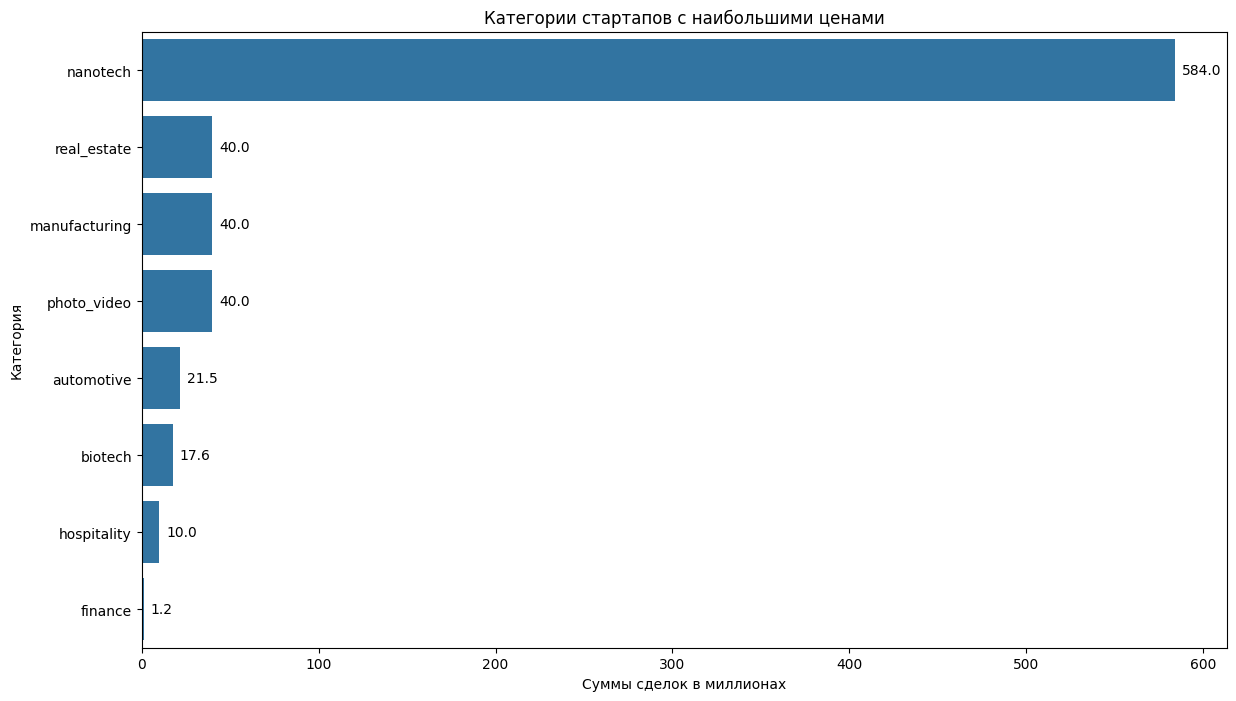

In [129]:
plt.figure(figsize=(14,8))
ax = sns.barplot(data=category_prices, x='price_amount_mln', y='category_code')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}',
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=10)
plt.title('Категории стартапов с наибольшими ценами')
plt.xlabel('Суммы сделок в миллионах')
plt.ylabel('Категория')
plt.show()

In [130]:
category_std = df.groupby('category_code')['price_amount'].std().sort_values(ascending=False).reset_index()
category_std

,category_code,price_amount
0,enterprise,104163452703.60
1,public_relations,3802535900.24
2,automotive,2147833365.67
3,real_estate,2129788210.65
4,biotech,1336462342.85
5,other,1058850372.21
6,health,987582038.97
7,manufacturing,947980006.15
8,software,729174792.66
9,finance,700186990.28


In [131]:
category_std = category_std.iloc[:7].copy()
category_std['price_amount_mln'] = category_std['price_amount'] / 1000000
category_std

,category_code,price_amount,price_amount_mln
0,enterprise,104163452703.60,104163.45
1,public_relations,3802535900.24,3802.54
2,automotive,2147833365.67,2147.83
3,real_estate,2129788210.65,2129.79
4,biotech,1336462342.85,1336.46
5,other,1058850372.21,1058.85
6,health,987582038.97,987.58


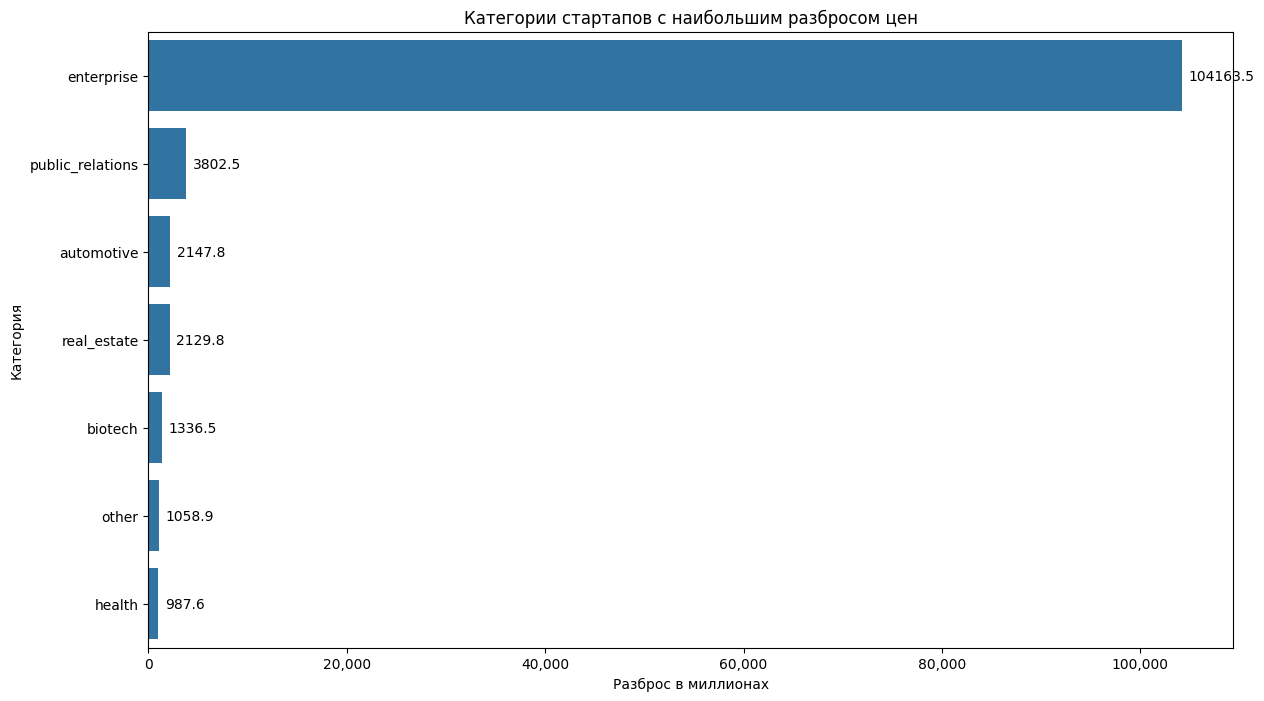

In [132]:
plt.figure(figsize=(14,8))
ax = sns.barplot(data=category_std, x='price_amount_mln', y='category_code')
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}',
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=10)
plt.title('Категории стартапов с наибольшим разбросом цен')
plt.xlabel('Разброс в миллионах')
plt.ylabel('Категория')
plt.show()

Мы видим, что категории стартапов с наибольшими ценами возглавляет **nanotech** с ценами около 584 миллионов.  
Этот показатель мы считали с помощью медианы, так как при подсчете среднего мы получим слишком большие значения, среднее гораздо выше медианы, как мы уже изучили выше.  
Здесь мы выбрали топ 7, так как ниже по медиане ничего нет.  
Наибольший разброс цен имеет категория **enterprise**, где разброс составляет 100 миллиардов долларов.  
Здесь мы выбрали топ 7, чтобы не получился огромный график, а разброс цен был выше 1 миллиарда.  


### 3.5. Сколько раундов продержится стартап перед покупкой

In [133]:
status_funding = df.groupby('status')['funding_rounds'].mean().reset_index()
status_funding

,status,funding_rounds
0,acquired,1.16
1,closed,1.88
2,ipo,3.99
3,operating,2.38


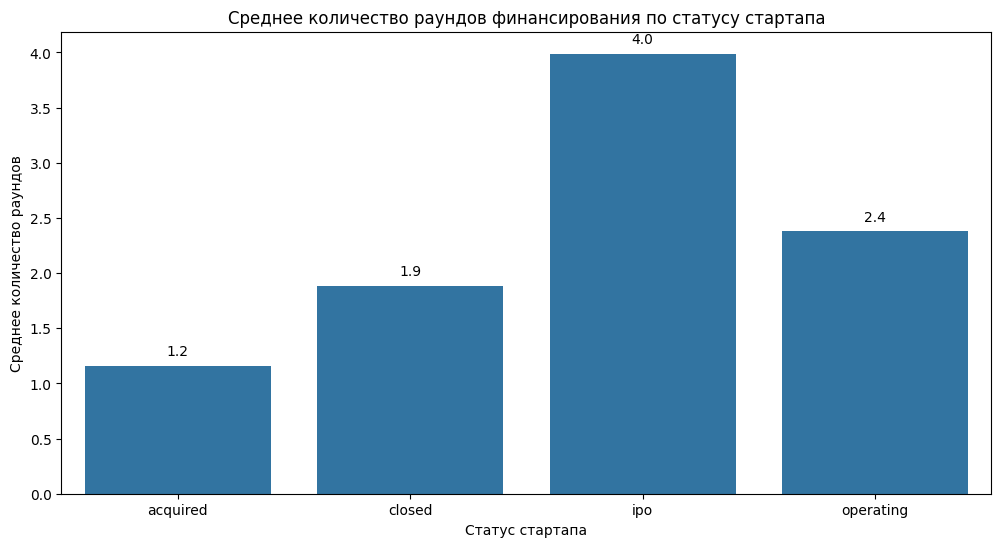

In [134]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=status_funding, x='status', y='funding_rounds')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',                   
                xytext=(0, 5),                              
                textcoords='offset points',                
                fontsize=10)
plt.title('Среднее количество раундов финансирования по статусу стартапа')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов')
plt.show()

Стартапы со статусом **acquired** (куплены) имеют в среднем всего 1.16 раунда.  
Закрытые стартапы **closed** проходили в среднем 1.88 раунда финансирования.  
Стартапы, вышедшие на **IPO**, имеют самое высокое среднее число раундов — 3.99.  
Работающие стартапы (operating) имеют в среднем 2.38 раунда финансирования.  

Из этих данных мы видим, что стартапы, которые были куплены другой компанией или закрыты, в среднем имеют меньшее количество раундов финансирования.   
А те стартапы, которые остались работать или вышли на IPO, имеют больше раундов финансирования.


## Шаг 4. Итоговый вывод и рекомендации


В ходе проекта были исследованы данные о стартапах, их финансировании, а также их сотрудниках.  

**Что было сделано**:  
- предобратока данных:  
    > Загружены и изучены данные о компаниях, инвестициях, покупках компаний, сотрудниках и их образовании.  
    > Проведена проверка и обработка пропущенных значений.  
    > Произведена смена типов данных у некоторых столбцов, в основном с датами.  
    > Выполнено объединение таблиц для формирования целостного набора данных.  
- фильтрация данных:  
    > Отобраны компании, которые имели хотя бы один инвестиционный или финансовый раунд или были куплены.  
- исследовательский анализ:  
    > Анализ выбросов в финансировании.  
    > Анализ нулевых покупок.  
    > Анализ цен стартапов по категориям, а также их разброс.  
    > Анализ раундов стартапов перед покупкой.  

**Выводы**:  
Типичный размер финансирования компаний имеет очень высокий разброс, это связано с тем, что некоторые стартапы получили крупное финансирование.  
При этом, некоторые компании, получившие финансирование, впоследствии были куплены бесплатно (за 0 или за 1 доллар). Эти данные могут указывать на совершение слияний компаний или поглощением мелких стартапов более крупными компаниями.  
Изучая цены по категориям, можно выделить нанотехнологии (nanotech), которые имеют самые выоские цены на стартапы, в среднем - 584 миллиона.  
Самый высокий разброс цен наблюдается в категории enterprise и превышает 100 миллиардов долларов.  
Также, судя по раундам финансирования, чем больше раундов финансирования компания получила - тем вероятнее стартап останется "на плаву" или даже проведёт IPO.  

Результаты анализа в целом подтверждают друг друга и дают целостную картину инвестиционной активности.  
Однако наличие значительных выбросов требует осторожности при интерпретации некоторых метрик.  